# Regressão Linear

## 1. Definições

Por regressão linear estamos falando em estimar uma variável $y$ a partir de uma série de características, sob a hipótese que existe uma relação aproximadamente linear entre saída e características. Por exemplo, estimar o preço de uma casa a partir de área construída, localização geográfica, etc. Partimos da equação 
\begin{equation}
\hat{y}=w_{1}x_{1}+w_{2}x_{2}+\cdots +w_{d}x_{D}+b,
\end{equation}
onde $\hat{y}$ é a estimativa da variável $y$ dadas as características $x_{i}$, $w_{i}$ são parâmetros do modelo a serem determinados, e $b$ é um valor de viés ("bias") para não nos restringirmos a retas e planos que passam pela origem. 

Generalizando em notação vetorial, sendo $\vec{x}$ o vetor de características e $\vec{w}$ o vetor de parâmetros,
\begin{equation}
\hat{y}=\vec{w}^{T}\vec{x}+b,
\end{equation}
onde T indica o vetor transposto. 

Finalmente, frequentemente em regressão temos uma grande quantidade de exemplos para ajustar o modelo. Poderíamos aplicar a equação acima $N$ vezes para $N$ exemplos, mas é mais conveniente imaginar todos os $N$ exemplos para $x$ em uma matriz $\matrix{X}$, de tamanho $N\times d$, ou seja, com um exemplo de parâmetros $x$ em cada linha. Neste caso, 
\begin{equation}
\hat{y}=\matrix{X}\matrix{W}+b,
\end{equation}
onde a matriz $\matrix{W}$ é obtida pela repetição do mesmo vetor de parâmetros $\vec{w}$ em N colunas. 

Obs: Lembre-se do "broadcasting" em Python. Você pode fazer o produto da matriz X pelo vetor W e ele será corretamente interpretado: o vetor W será repetido em N colunas, e o resultado do produto (que é uma matriz NxN, com a estimativa para cada exemplo repetido N vezes), será re-interpetado como um vetor de tamanho N. 

## 2. Função de custo

Queremos encontrar os melhores valores $w$ e $b$, mas em qual critério? Geralmente queremos minimizar alguma função de custo ("loss function"). Uma escolha muito comum para o caso da regressão é a soma dos erros quadráticos. Em outras palavras, queremos minimizar a norma L2 da diferença entre valores estimados e reais. 
\begin{equation}
L(\vec{w},b)=\frac{1}{N}\sum_{i=1}^{N}\left( \vec{w}^{T}\vec{x}^{(i)}-y^{(i)}\right)^{2},
\end{equation}
onde o sobrescrito $(i)$ faz referência ao i-ésimo exemplo. 

Note que multiplicar L por uma constante não altera o problema. Daí ser normal a divisão por N (tornando L uma média do erro quadrático). Quando formos derivar esta expressão, é conveniente colocar um fator $\frac{1}{2}$ para cancelar o 2 do expoente. 

Nestas condições, o problema se torna encontrar valores ótimos $\vec{w}^{*}$ e $b^{*}$ segundo
\begin{equation}
\vec{w}^{*}, b^{*} = \text{argmin}\ L(\vec{w},b)
\end{equation}

## 3. Solução Analítica

Este problema de minimização tem solução única (se fizermos o requisito adicional que $\vec{w}$ tenha norma mínima. A demonstração pode ser encontrada em livros de álgebra linear. Para simplificar as coisas (como já avisamos que faríamos) vamos adicionar $b$ ao final do vetor $w$ (que passaará a ter tamanho $d+1$ e acrescentar uma parâmetro fictício 1 ao final de cada exemplo em $\matrix{X}$. Neste caso, passamos a ter $\hat{y}=\matrix{X}\matrix{W}$. Com essas modificações, a solução é 
\begin{equation}
\vec{w}^{*} = \left(\matrix{X}^{T}\matrix{X}\right)^{-1}\matrix{X}^{T}\vec{y},
\end{equation}
se a matriz $\matrix{X}^{T}\matrix{X}$ é inversível. Para que seja inversível, os exemplos não podem ser linearmente dependentes. 

Mesmo sem demonstração, algumas observações podem ser esclarecedoras. Primeiro observe que, se $y$ e $x$ realmente tivessem um relacionamento linear, eu só precisaria de $d$ exemplos diferentes. A matriz $\matrix{X}$ seria quadrada de tamanho $d$, e tudo se resumiria a um conjunto de $N$ equações e $N$ incógnitas, com a solução dada por $\vec{w}^{*}=\matrix{X}^{-1}\vec{y}$. Assim, a matriz $\left(\matrix{X}^{T}\matrix{X}\right)^{-1}\matrix{X}^{T}$ está agindo como a "inversa" da matriz retangular $\matrix{X}$, que a rigor não pode ter inversa. Por isso, esta matriz é chamada pseudo-inversa (ou inversa de Moore-Penrose). 

Ocorre que o relacionamento não é, de fato, linear. Ou então, este modelo está desprezando a influência de outras variáveis, o que faz a resposta estar ligeiramente errada para cada exemplo (o que será visto como um ruído no nosso modelo). Assim, eu reúno um grande número de exemplos e aplico a equação acima. 

Para problemas verdadeiramente de interesse em IA, o modelo linear é muito limitado, e assim que colocarmos uma não-linearidade deixamos de ter esta solução analítica. Mesmo que ela exista, pode ser impraticável de calcular em um único passo (se houver milhões de exemplos). Precisamos ver como minimizar iterativamente o erro quadrático. 

## 4. Otimização por Gradiente

A alternativa quando é impossível (analítica ou computacionalmente) calcular o valor ótimo na forma acima, é usar a descida por gradiente que vimos na aula passada. Em particular, neste método, apresenta-se um exemplo $\vec{x}^{(i)}$ ao modelo, obtendo-se a estimativa $\hat{y}^{(i)}$, e os parâmetros são atualizados na forma de um ajuste $\vec{\Delta w}$, calculado de acordo com 
\begin{equation}
\vec{\Delta w}=-\eta\  \vec{x}^{(i)}\left( \hat{y}^{(i)} - y^{(i)} \right)
\end{equation}
\begin{equation}
\Delta b = -\eta\ \left( \hat{y}^{(i)} - y^{(i)} \right),
\end{equation}
onde $\eta$ é uma constante, frequentemente denominada "de aprendizado" na área de redes neurais. 

A atualização acima, vinda de considerações de derivada, tem um resultado intuitivamente correto. Observe que a atualização depende do produto da entrada e o erro, de forma tal que, se a saída deveria ser maior do que foi, e a entrada é positivo, a conexão com aquela entrada é fortalecida. Veja também que está implícita uma forma de correlação entre entrada e saída, não muito longe do que Hebb imaginou para a adaptação de conexões sinápticas. 

Note também como, mais uma vez, podemos simplificar as coisas considerando o "bias" b como simplesmente um peso adicional ligado a uma entrada fictícia que vale sempre 1. 

Este tipo de atualização é chamada "online" ou "estocástica". Uma alternativa é calcular a correção dos parâmetros a partir de todos os exemplos, segundo
\begin{equation}
\vec{\Delta w}=-\frac{\eta}{N}\  \sum_{i=1}^{N}\vec{x}^{(i)}\left( \hat{y}^{(i)} - y^{(i)} \right)
\end{equation}
\begin{equation}
\Delta b = -\frac{\eta}{N}\  \sum_{i=1}^{N}\left( \hat{y}^{(i)} - y^{(i)} \right).
\end{equation}

Esta é a chamada atualização em batelada ("batch"). Observe que, como a atualização tende a ser maior em módulo neste caso (porque somamos a atualização devida ao erro calculado em todos os exemplos), dividimo-la por $N$. A rigor, isto é um preciosismo, porque o valor de $\eta$ é geralmente definido por tentativa. Serve para nos lembrar, no entanto, que em geral a constante de aprendizado deve ser menor neste caso. 

Nos problemas complexos em que aplicamos aprendizado de máquina hoje, com bilhões de parâmetros e milhões de exemplos, a solução que se mostrou mais útil é intermediária entre esses dois extremos. Os $N$ exemplos são separados em "minibatches" $\mathscr{B}$, de tamanho menor que N. O processamento e atualização são feitos sequencialmente por minibatch. 

## 5. Relação com Neurônio Artificial

Vimos que um primeiro modelo simplificado de neurônio efetua uma soma ponderada de entradas e a passa por uma função do tipo limiar ("threshold"). Se retiramos esta não-linearidade, observe que temos algo indistinguível do modelo de regressão linear que discutimos aqui. 


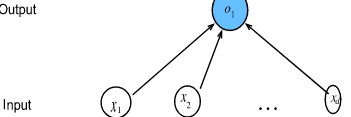

Assim, observe que este nosso primeiro modelo "inteligente" pode ser compreendido perfeitamente como vindo do campo da probabilidade e estatística. 